In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
songs = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs.csv')

In [3]:
songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.786,0.870,2.0,-5.839,1.0,0.0507,0.04930,0.215000,0.0863,0.676,126.011,audio_features,7LVEBvmKB5uDTg0CGqDo3p,spotify:track:7LVEBvmKB5uDTg0CGqDo3p,https://api.spotify.com/v1/tracks/7LVEBvmKB5uD...,https://api.spotify.com/v1/audio-analysis/7LVE...,192482.0,4.0,house
1,0.740,0.934,7.0,-3.255,1.0,0.3160,0.00822,0.000377,0.1160,0.685,124.936,audio_features,0m69QNuZVZDXhGHBGK1mQA,spotify:track:0m69QNuZVZDXhGHBGK1mQA,https://api.spotify.com/v1/tracks/0m69QNuZVZDX...,https://api.spotify.com/v1/audio-analysis/0m69...,154680.0,4.0,house
2,0.889,0.859,11.0,-5.110,1.0,0.2050,0.02160,0.106000,0.7370,0.828,124.958,audio_features,4PfzZIFxK10aHXupOm4qEu,spotify:track:4PfzZIFxK10aHXupOm4qEu,https://api.spotify.com/v1/tracks/4PfzZIFxK10a...,https://api.spotify.com/v1/audio-analysis/4Pfz...,142560.0,4.0,house
3,0.840,0.868,11.0,-6.173,0.0,0.0721,0.02590,0.573000,0.0891,0.851,126.001,audio_features,6uABa7vKOgFqXnwvk8NBr5,spotify:track:6uABa7vKOgFqXnwvk8NBr5,https://api.spotify.com/v1/tracks/6uABa7vKOgFq...,https://api.spotify.com/v1/audio-analysis/6uAB...,203810.0,4.0,house
4,0.740,0.989,10.0,-4.193,1.0,0.0469,0.00276,0.956000,0.3060,0.934,125.001,audio_features,6fcHhf9bix2uLbKHApSkNy,spotify:track:6fcHhf9bix2uLbKHApSkNy,https://api.spotify.com/v1/tracks/6fcHhf9bix2u...,https://api.spotify.com/v1/audio-analysis/6fcH...,142080.0,4.0,house


In [21]:
columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',	'liveness','valence','tempo','type','id','uri','track_href','analysis_url','duration_ms','time_signature',	'genre']

In [4]:
house_count_original = songs.loc[songs['genre'] == 'house', 'id']
techno_count_original = songs.loc[songs['genre'] == 'techno', 'id']
dnb_count_original = songs.loc[songs['genre'] == 'dnb', 'id']
hardstyle_count_original = songs.loc[songs['genre'] == 'hardstyle', 'id']
trap_count_original = songs.loc[songs['genre'] == 'trap', 'id']
total_count_original = house_count_original + techno_count_original + dnb_count_original + hardstyle_count_original + trap_count_original

In [5]:
print("Original Count of House Songs:        ",len(house_count_original))
print("Original Count of Techno Songs:       ",len(techno_count_original))
print("Original Count of Drum & Bass Songs:  ",len(dnb_count_original))
print("Original Count of Hardstyle Songs:    ",len(hardstyle_count_original))
print("Original Count of Trap Songs:         ",len(trap_count_original))
print("Original Count of All Songs:          ",len(total_count_original))

Original Count of House Songs:         3883
Original Count of Techno Songs:        4794
Original Count of Drum & Bass Songs:   5172
Original Count of Hardstyle Songs:     9280
Original Count of Trap Songs:          11364
Original Count of All Songs:           34493


In [6]:
songs_unique = songs

In [7]:
songs_unique = songs_unique.drop_duplicates(subset = "uri", keep = 'first', inplace = False, ignore_index = True)
songs_unique.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.786,0.870,2.0,-5.839,1.0,0.0507,0.04930,0.215000,0.0863,0.676,126.011,audio_features,7LVEBvmKB5uDTg0CGqDo3p,spotify:track:7LVEBvmKB5uDTg0CGqDo3p,https://api.spotify.com/v1/tracks/7LVEBvmKB5uD...,https://api.spotify.com/v1/audio-analysis/7LVE...,192482.0,4.0,house
1,0.740,0.934,7.0,-3.255,1.0,0.3160,0.00822,0.000377,0.1160,0.685,124.936,audio_features,0m69QNuZVZDXhGHBGK1mQA,spotify:track:0m69QNuZVZDXhGHBGK1mQA,https://api.spotify.com/v1/tracks/0m69QNuZVZDX...,https://api.spotify.com/v1/audio-analysis/0m69...,154680.0,4.0,house
2,0.889,0.859,11.0,-5.110,1.0,0.2050,0.02160,0.106000,0.7370,0.828,124.958,audio_features,4PfzZIFxK10aHXupOm4qEu,spotify:track:4PfzZIFxK10aHXupOm4qEu,https://api.spotify.com/v1/tracks/4PfzZIFxK10a...,https://api.spotify.com/v1/audio-analysis/4Pfz...,142560.0,4.0,house
3,0.840,0.868,11.0,-6.173,0.0,0.0721,0.02590,0.573000,0.0891,0.851,126.001,audio_features,6uABa7vKOgFqXnwvk8NBr5,spotify:track:6uABa7vKOgFqXnwvk8NBr5,https://api.spotify.com/v1/tracks/6uABa7vKOgFq...,https://api.spotify.com/v1/audio-analysis/6uAB...,203810.0,4.0,house
4,0.740,0.989,10.0,-4.193,1.0,0.0469,0.00276,0.956000,0.3060,0.934,125.001,audio_features,6fcHhf9bix2uLbKHApSkNy,spotify:track:6fcHhf9bix2uLbKHApSkNy,https://api.spotify.com/v1/tracks/6fcHhf9bix2u...,https://api.spotify.com/v1/audio-analysis/6fcH...,142080.0,4.0,house


In [8]:
songs_unique.shape

(24035, 19)

In [24]:
house_count_unique = songs_unique.loc[songs_unique['genre'] == 'house', columns]
techno_count_unique = songs_unique.loc[songs_unique['genre'] == 'techno', columns]
dnb_count_unique = songs_unique.loc[songs_unique['genre'] == 'dnb', columns]
hardstyle_count_unique = songs_unique.loc[songs_unique['genre'] == 'hardstyle', columns]
trap_count_unique = songs_unique.loc[songs_unique['genre'] == 'trap', columns]

In [27]:
print(house_count_unique['id'].count())
print(techno_count_unique['id'].count())
print(dnb_count_unique['id'].count())
print(hardstyle_count_unique['id'].count())
print(trap_count_unique['id'].count())

3166
4028
4139
5896
6805


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
3166,0.800,0.842,6.0,-8.674,1.0,0.0513,0.00136,0.892,0.0917,0.0416,127.983,audio_features,52GRfo1fNyym5u2GXbOLtg,spotify:track:52GRfo1fNyym5u2GXbOLtg,https://api.spotify.com/v1/tracks/52GRfo1fNyym...,https://api.spotify.com/v1/audio-analysis/52GR...,389420.0,4.0,techno
3167,0.850,0.810,9.0,-7.364,1.0,0.0658,0.11300,0.858,0.1110,0.1230,128.994,audio_features,5olyO9wuEEAnmIPimW0hSR,spotify:track:5olyO9wuEEAnmIPimW0hSR,https://api.spotify.com/v1/tracks/5olyO9wuEEAn...,https://api.spotify.com/v1/audio-analysis/5oly...,418098.0,4.0,techno
3168,0.802,0.818,10.0,-10.184,1.0,0.0397,0.00221,0.933,0.1170,0.4660,139.994,audio_features,5gd0HejASad00kbDUFABnV,spotify:track:5gd0HejASad00kbDUFABnV,https://api.spotify.com/v1/tracks/5gd0HejASad0...,https://api.spotify.com/v1/audio-analysis/5gd0...,363429.0,4.0,techno
3169,0.680,0.995,8.0,-8.965,0.0,0.0492,0.07350,0.938,0.1150,0.1490,135.016,audio_features,2fH7BUgSFwXEH9oB2R051B,spotify:track:2fH7BUgSFwXEH9oB2R051B,https://api.spotify.com/v1/tracks/2fH7BUgSFwXE...,https://api.spotify.com/v1/audio-analysis/2fH7...,348784.0,4.0,techno
3170,0.586,0.955,7.0,-8.540,1.0,0.0653,0.00306,0.880,0.0957,0.6330,139.992,audio_features,2lCQ1Dp6xOp9VntHlFevyo,spotify:track:2lCQ1Dp6xOp9VntHlFevyo,https://api.spotify.com/v1/tracks/2lCQ1Dp6xOp9...,https://api.spotify.com/v1/audio-analysis/2lCQ...,276169.0,4.0,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,0.581,0.974,6.0,-6.657,0.0,0.1150,0.10500,0.163,0.1050,0.5090,75.014,audio_features,4pHPgZOypoLFxt7oRoyjaQ,spotify:track:4pHPgZOypoLFxt7oRoyjaQ,https://api.spotify.com/v1/tracks/4pHPgZOypoLF...,https://api.spotify.com/v1/audio-analysis/4pHP...,288000.0,4.0,techno
7190,0.625,0.994,2.0,-7.794,1.0,0.0786,0.02370,0.132,0.2890,0.2560,74.994,audio_features,3MVdAEHp17znDQx29i7Kna,spotify:track:3MVdAEHp17znDQx29i7Kna,https://api.spotify.com/v1/tracks/3MVdAEHp17zn...,https://api.spotify.com/v1/audio-analysis/3MVd...,339871.0,4.0,techno
7191,0.639,0.995,11.0,-8.407,1.0,0.0375,0.00613,0.876,0.1680,0.5610,145.003,audio_features,05ve257LhFO9nGTzM3pfoC,spotify:track:05ve257LhFO9nGTzM3pfoC,https://api.spotify.com/v1/tracks/05ve257LhFO9...,https://api.spotify.com/v1/audio-analysis/05ve...,344276.0,4.0,techno
7192,0.674,0.978,6.0,-8.647,1.0,0.0902,0.00159,0.769,0.1130,0.1670,141.995,audio_features,7qP2fyygL7lmm6Ti2gHDr5,spotify:track:7qP2fyygL7lmm6Ti2gHDr5,https://api.spotify.com/v1/tracks/7qP2fyygL7lm...,https://api.spotify.com/v1/audio-analysis/7qP2...,358310.0,4.0,techno


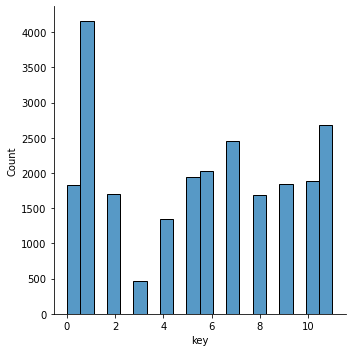

In [35]:
sns.displot(songs_unique, x="key", bins = 20)